In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

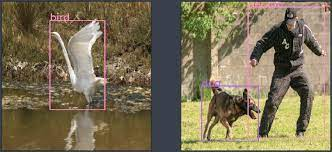

### opencv를 활용한 객체 검출
- opencv내에는 yolov3의 객체를 라이브러리로 제공
- YOLO : You Only Look Once
    - 한개의 네트워크에서 탐지를 원하는 물체의 영역(bounding box)과 이름을 표시함
1. YOLO 기본 구조
- YOLOV3-416 : 416x416이미지를 input으로 하는 모델을 의미
- 총 3개의 output layer를 갖고 있음(82,94,106레이어)
- 피처 정보들을 조합하여 찾고자 하는 객체 위치를 찾는다
- 입력된 이미지를 일정 분할로 그리드 한 다음(그리드기준 분할함)
     - 잘게 쪼개진 이미지를 신경망을 통과시켜서 클래스 예측
     - 객체 검출만 진행하는 알고리즘이고 회귀문제로 정의하고 있다고 발표함
 - 단점 : 작은물체에 대한 검출성능이 떨어짐(V3)

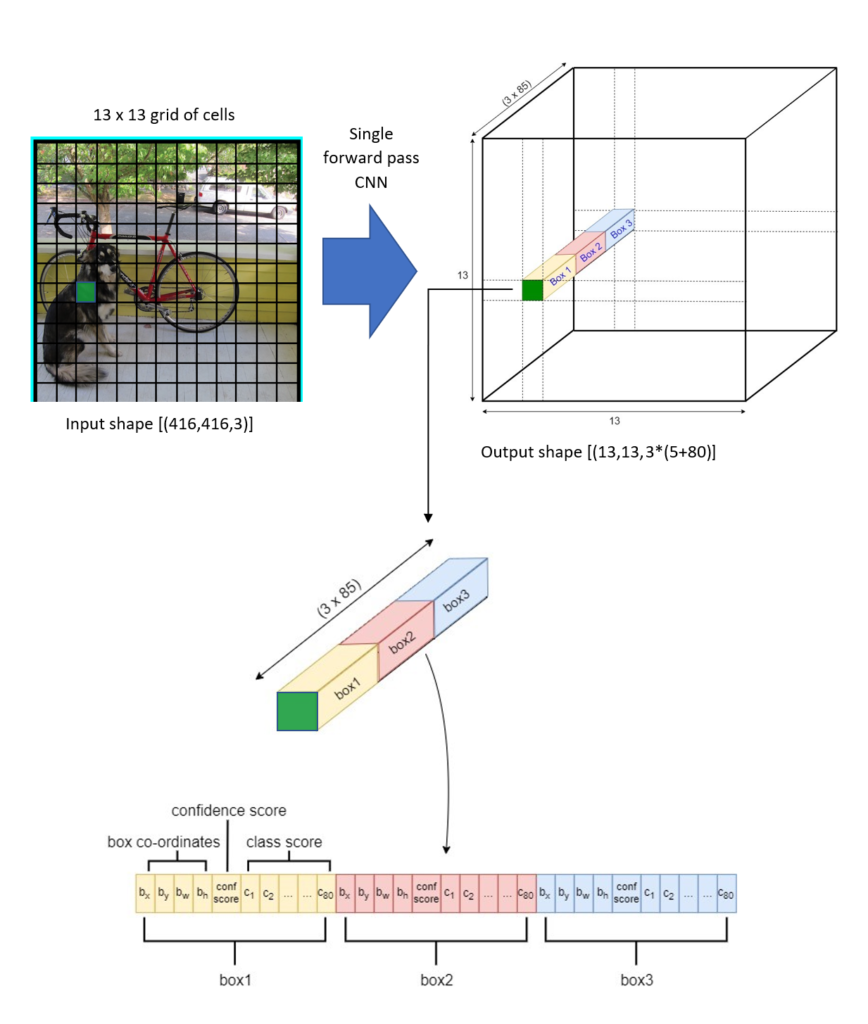

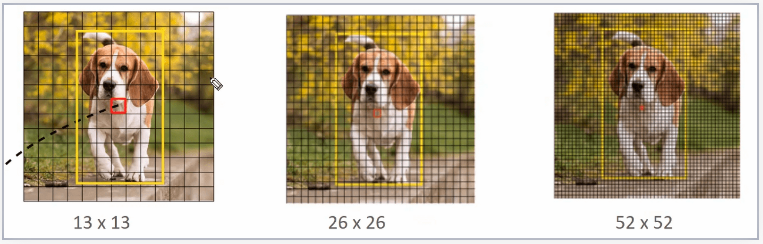

#### cv 활용한 객체 검출 처리순서
1. 이미지 주입(일반이미지, 웹캡 스트림, 컴퓨터캡처, 영상 등 ndarray로 치환할 수 있다면 사용 가능)
2. S x S로 이미지 나누기(그리드)
3. 각 그리드에서 예측을 한 후 이를 종합해서 bouding box를 구성

### YOLO 사용법
- 딥러닝 프레임워크가 제공하면 해당 프레임 워크를 사용
1. Darknet : YOLO 개발자가 만든 프레임워크. YOLO를 위해 특별히 제작
- 코랩은 Darknet을 사용하면 됨
- 장점 : 빠르다. GPU또는 CPU와 함께 사용가능
- 단점 : 리눅스에서만 호환됨

2. Darkflow : Darknet을 텐서플로우에 적용한것
- 장점 : 빠르고 GPU 또는 CPU와 함께 사용 가능하고 리눅스, 윈도우, 맥에서 호환
- 단점 : 설치 복잡

3. OpenCV : 최소 3.4.2버전 필요
- 장점 : openCV외에 설치만필요
- 단점 : CPU에서만 작동하기 때문에 비디오를 실시간으로 처리하는 데 속도가 빠르진 않다

4. pytorch를 사용
- yolo 최신버전까지 포함되어 있음
- GPU 사용해야 함

### OpenCV DNN YOLO 사용하기(사용법 위주로)
- yolo 사이트에서 기 학습된 모델의 weight와 conf 파일을 받아와야 함
- https://pjreddie.com/darknet/yolo/
- weight file : 훈련된 모델
- cfg file : 구성파일(모델 구성파일)
- name files : 모델이 감지할 수 있는 객체 명

### 사용 데이터 셋
- 자동차 인식 데이터 셋(캐글데이터)

### Open CV: 비전 처리 패키지를 활용한 YOLO모델 구현
- 기 학습된 모델 활용
- 가중치파일과 구성파일 활용
- cv.dnn.readNet(가중치파일, 구성파일)

In [2]:
# 기 학습된 모델 가중치를 활용한 구성
net = cv2.dnn.readNet("yolov3.cfg", "yolov3.weights")

### yolov3 라벨
- ms coco 데이터셋을 사용하는 구조 : classes 수가 80
- 해당 데이터셋 라벨 파일 읽어서 저장

In [3]:
### label 작성
classes = []
with open("coco.names.txt", "r") as f :
    classes = [line.strip() for line in f.readlines()] # 한줄씩 읽기라 80번 반복
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [7]:
## yolov3 층 확인
layer_names = net.getLayerNames()
print(layer_names)

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [9]:
net.getUnconnectedOutLayers()

array([200, 227, 254])

In [11]:
output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

### 전체 모델 layer에서 82, 94, 106의 3개의 yolo 출력을 반환함

In [13]:
## 객체 검출 이미지 
img = cv2.imread("vid_4_1000.jpg")
## 이미지 BGR 형태로 읽어오므로 RGB로 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width, channels = img.shape

- 네트워크(모델)에서 이미지를 바로 사용할 수 없기 때문에 모델에 맞는 이미지파일로 변경해야 함-사용하는 yolo 가중치 416 사용
    - yolo는 Blob 파일을 사용
    - cv2.dnn.blobFromImage(img,scalefactor=1/255.0,size=(416,416),swapRB=True,crop=False)

In [18]:
## 이미지 전처리 진행 - cv2.dnn 모델이 사용하는 형태로 변환
blob = out = cv2.dnn.blobFromImage(img, scalefactor = 1/255.0, 
                                   size = (416,416),
                                   swapRB = True,
                                   crop = False)

In [19]:
print(type(out))
print(out.shape)
print(out.size)

<class 'numpy.ndarray'>
(1, 3, 416, 416)
519168


In [20]:
# 해당 이미지 모델에 주입 : 객체 검출을 하기 위한 이미지 input
net.setInput(blob)

In [21]:
# 객체 검출 : forward()
outs = net.forward(output_layers)

In [22]:
outs

(array([[0.0417662 , 0.0370572 , 0.27942246, ..., 0.        , 0.        ,
         0.        ],
        [0.05650763, 0.03522927, 0.2338536 , ..., 0.        , 0.        ,
         0.        ],
        [0.05561158, 0.02743685, 0.9304801 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9558081 , 0.95179284, 0.5278139 , ..., 0.        , 0.        ,
         0.        ],
        [0.95625484, 0.9690389 , 0.33986238, ..., 0.        , 0.        ,
         0.        ],
        [0.9540495 , 0.954152  , 0.8063623 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.02436181, 0.02164267, 0.05693799, ..., 0.        , 0.        ,
         0.        ],
        [0.01751605, 0.02230537, 0.25826108, ..., 0.        , 0.        ,
         0.        ],
        [0.02699582, 0.01867073, 0.09028084, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9688106 , 0.9762013 , 0.04897676, ..., 0.        , 0.        ,
         0.        

In [23]:
print('cv_outs type : list, cv_outs length : ', len(outs))

cv_outs type : list, cv_outs length :  3


In [24]:
len(outs[0][0])

85

In [25]:
outs[0][1]

array([5.6507628e-02, 3.5229273e-02, 2.3385359e-01, 8.7647957e-01,
       3.6431678e-09, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [27]:
# 그리드 13X13
outs[0]
# 그리드 26X26
outs[1]
# 52X52 뒤쪽 출력일수록 이미지를 더 작게 분할해서 학습
outs[2]
# 바운딩박스좌표 4개, confidence 1개, 각 classes별 확률(80)
len(outs[2][0])

85

In [30]:
outs[2].shape

(8112, 85)

### bounding box 그리기

In [28]:
# 정보를 화면에 표시
class_ids = [] # 추정된 라벨 id
confidences = [] # 추정된 라벨에 대한 신뢰도
boxes = [] # 바운딩박스 좌표
n=0
for out in outs: # outlyaer0번의 결과, 1번의 결과 2번의 결과가 한번씩 대입
    n += 1
    for detection in out: # 각 layer의 결과가 detection에 한번씩 대입
        scores = detection[5:] # 앞의 5개 data는 box좌표와 신뢰도가 있고, 
        # 5번 인덱스부터 클래스에 대한 확률이 들어감
        class_id = np.argmax(scores) # 제일 확률이 높은 값의 인덱스        
        confidence = scores[class_id] # 제일높은 확률 값 - 확률값을 사용해서 conf 생성
        
        if confidence > 0.5: # 제일 큰 확률값이 0.5보다 크면 객체 검출
            # Object detected
            print(n)
            print(class_id)                      
            print(confidence)
            print(detection[:5])
            # img를 blob 화 하면서 scaling이 진행되었으므로 이미지 원 크기에 비례해서 조정해야 함
            # 이미지에 box그리기 위해서 x,y 중심점(이미지 중심점) 계산
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            # 이미지의 width height 계산
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # 좌표(중심좌표에서 w,h의 50%만큼 감소)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

3
2
0.57420135
[0.45077747 0.5357863  0.03994167 0.05000636 0.73783904]
3
2
0.8746977
[0.45208406 0.5456847  0.04638352 0.05621149 0.962288  ]


In [31]:
boxes
# confidences
# class_ids

[[290, 193, 27, 19], [289, 196, 31, 21]]

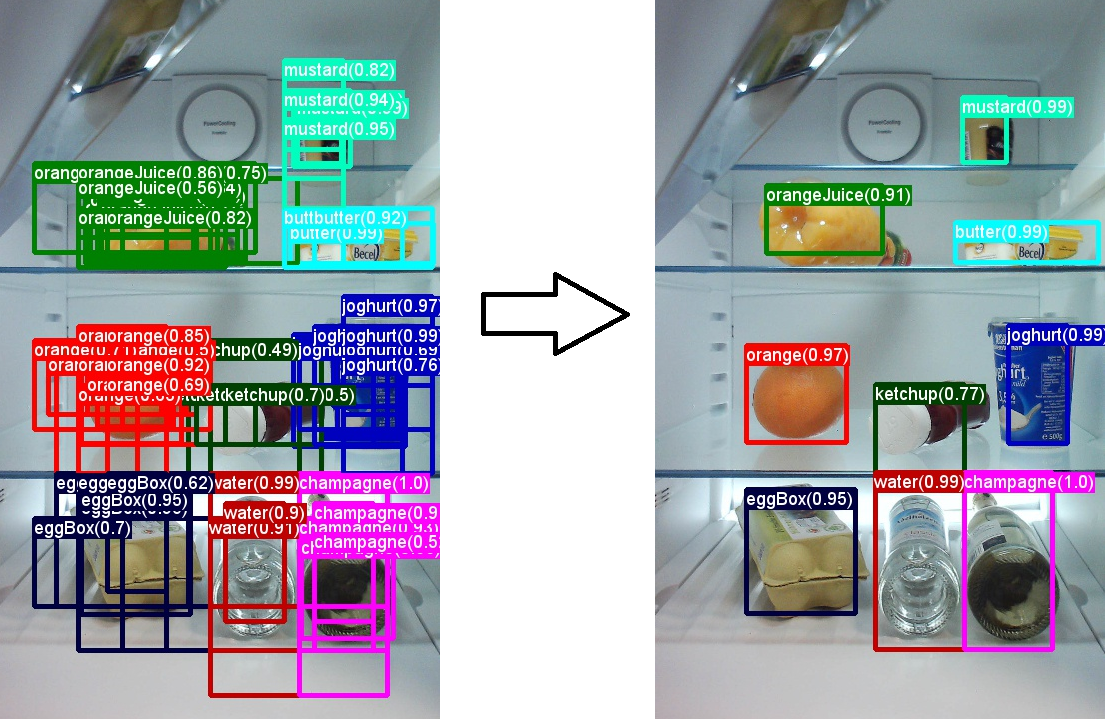

In [34]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
# confidences score가 0.5보다 크고 남겨진 box와 iou간의 threshold 0.4 초과인 box만 검출

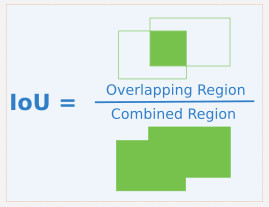

### 추출된 모든 정보를 화면에 표시
- Box : 감지도니 개체를 둘러싼 사각형의 좌표
- Label : 감지된 물체의 이름
- Confidence : 0에서 1까지의 탐지에 대한 신뢰도

In [36]:
indexes.flatten()

array([1])

In [78]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(boxes), 3))
colors

array([[153.34153465, 111.75920861,  43.10631621],
       [206.43242939, 222.11699917,  47.39248647]])

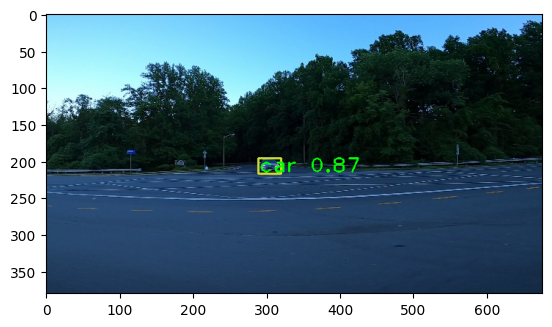

In [79]:
for i in indexes.flatten() : # box 처리할 개체가 여러개일 경우 차원 축소
    x,y,w,h = boxes[i]
#     print(x,y,w,h)
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i],2))
    color = colors[i]
    cv2.rectangle(img,(x,y), ((x+w),(y+h)),color, 2)
    cv2.putText(img, label+" "+confidence,(x,y+20),font,2,(0,255,0),2)
plt.imshow(img)    

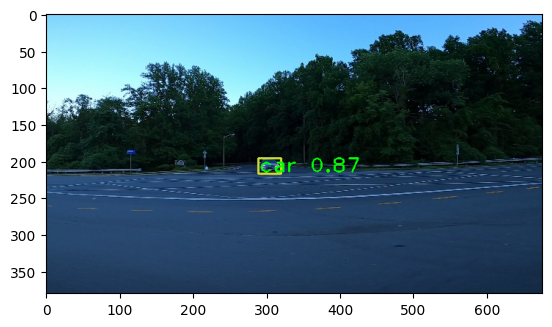

In [80]:
plt.imshow(img)

In [83]:
plt.show()

### 예측 후 시각화 함수 구현

In [85]:
def predict_yolo(img_path):
    # 이미지 가져오기
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, channels = img.shape

    # 이미지 검출
    blob = cv2.dnn.blobFromImage( img, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False)
    net.setInput(blob) 
    outs = net.forward(output_layers)

    # bounding box 그리기
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                # 좌표
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0, 255, size=(len(boxes), 3))
    if len(indexes) > 0:
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            print(x, y, w, h)
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i], 2))
            color = colors[i]
            cv2.rectangle(img, (x, y), ((x+w), (y+h)), color, 2)
            cv2.putText(img, label + " " + confidence, (x, y+20), font, 2, (0, 255, 0), 2)

            plt.imshow(img)
            plt.show()

    else:
        print('탐지된 물체가 없습니다.')

In [6]:
import glob
import random

paths = glob.glob('cardataset/testing_images/*.jpg')
img_path = random.choice(paths)
print(img_path)

predict_yolo(img_path)